# Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['Apple_Black_rot','Apple_Cedar_apple_rust','Apple_healthy','Cherry_(including_sour)_healthy',
              'Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)_Common_rust','Corn_(maize)_healthy',
              'Grape_Black_rot','Grape_Esca_(Black_Measles)','Grape_healthy']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():

    datasets = ['C:/Users/JAYASRI/Music/plantleaf/Train', 'C:/Users/JAYASRI/Music/plantleaf/Test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
def suggestions1():
    if (pred_labels==0):
        print("Precaution:-combined use of culture, sanitation, resistance, and fungicide sprays")
    elif (pred_labels==1):
        print("Precaution:-Prune and remove brown, woody galls found before orange, gelatinous structures form in the spring")
    elif (pred_labels==2):
        print("Precaution:-no need of any pesticide")
    elif (pred_labels==3):
        print("Precaution:-no need of any pesticide")
    elif (pred_labels==4):
        print("Precaution:-Adopt crop rotation")
    elif (pred_labels==5):
        print("Precaution:-Apply a foliar fungicide")
    elif (pred_labels==6):
        print("Precaution:-no need anything")
    elif (pred_labels==7):
        print("Precaution:-Provide trees with adequate water")
    elif (pred_labels==8):
        print("Precaution:- early season fungicide sprays should be timed to prevent the earliest infections")
    else:
        print("no need anything")


In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/JAYASRI/Music/plantleaf/Train


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 160.83it/s]


Loading C:/Users/JAYASRI/Music/plantleaf/Test


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 179.95it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 965
Number of testing examples: 965
Each image is of size: (150, 150)


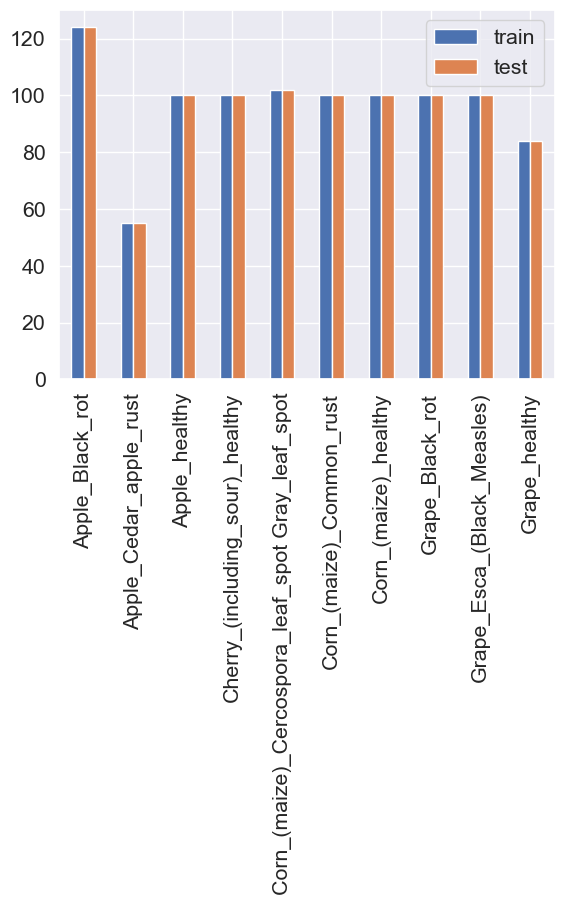

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

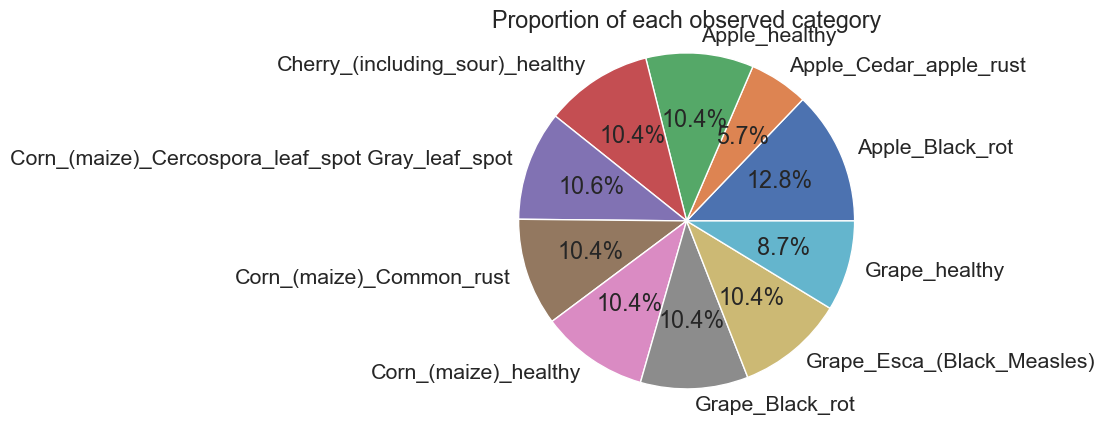

In [9]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0,) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [11]:
def display_random_image(class_names, images, labels):


    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

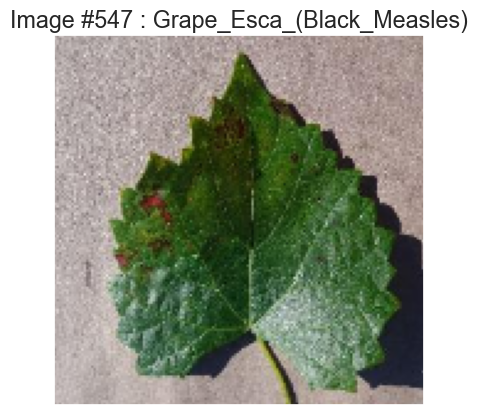

In [12]:
display_random_image(class_names, train_images, train_labels)

In [13]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]],fontsize=8)
    plt.show()

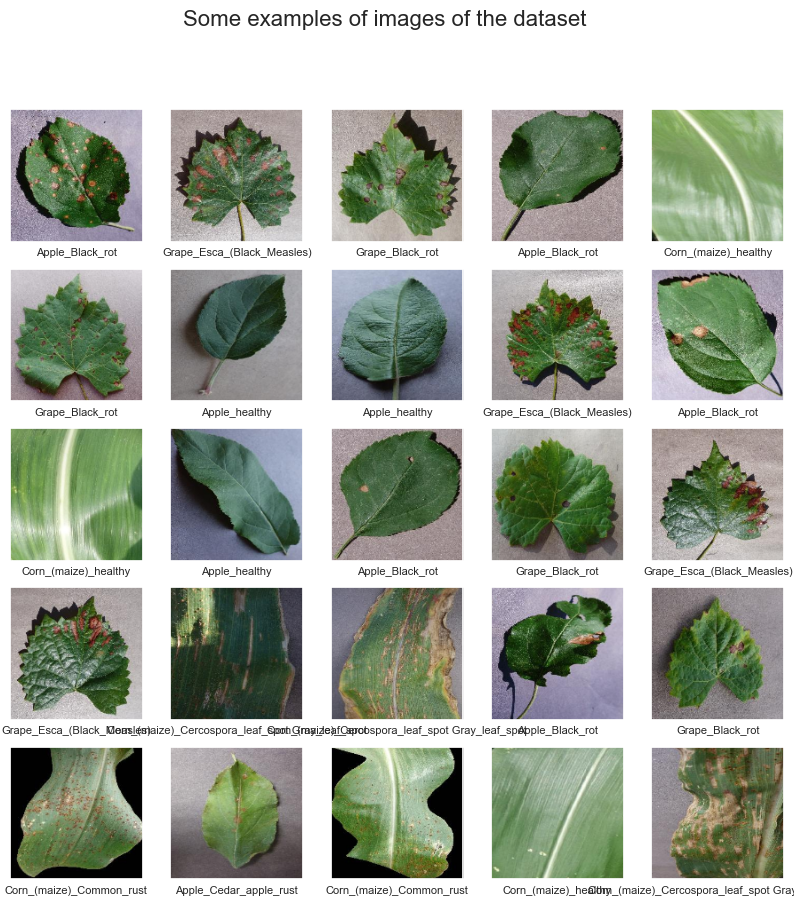

In [14]:
display_examples(class_names, train_images, train_labels)

In [15]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\JAYASRI\.anaconda\ana4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = cnn_model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split = 0.2)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 833ms/step - accuracy: 0.0893 - loss: 4.1533 - val_accuracy: 0.1451 - val_loss: 2.4530
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 718ms/step - accuracy: 0.2004 - loss: 2.2579 - val_accuracy: 0.1451 - val_loss: 2.1054
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 709ms/step - accuracy: 0.3072 - loss: 1.9269 - val_accuracy: 0.3472 - val_loss: 1.8257
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 814ms/step - accuracy: 0.5065 - loss: 1.5894 - val_accuracy: 0.5492 - val_loss: 1.4476
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step - accuracy: 0.6759 - loss: 1.1709 - val_accuracy: 0.5181 - val_loss: 1.6615
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 776ms/step - accuracy: 0.6683 - loss: 0.9828 - val_accuracy: 0.6321 - val_loss: 0.9224
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 707ms/step - accuracy: 0.7768 - loss: 0.6402 - val_accuracy: 0.8083 - val_loss: 0.6762
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - accuracy: 0.8807 - loss: 0.4090 - val_accuracy: 0.7565 - val_loss

In [18]:
test_loss = cnn_model.evaluate(test_images, test_labels)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9691 - loss: 0.0873


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
[0]
Precaution:-combined use of culture, sanitation, resistance, and fungicide sprays


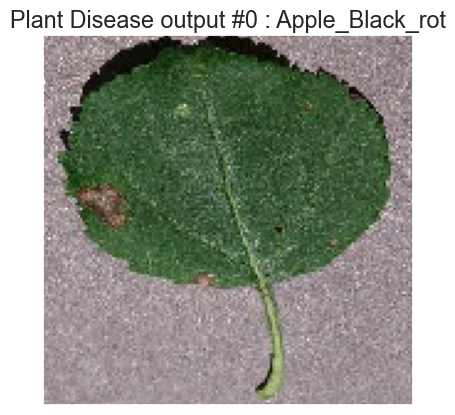

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/JAYASRI/Music/plantleaf/Test/Apple_Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = cnn_model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
suggestions1()
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Plant Disease output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

In [20]:
cnn_model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
cnn_model_json=cnn_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(cnn_model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model.weights.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = cnn_model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Cherry_(including_sour)___healthy',
              'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy',
              'Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(cnn_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [27/May/2024 09:23:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2024 09:23:42] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2024 09:23:42] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2024 09:23:42] "GET /static/images/bg.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2024 09:23:42] "GET /favicon.ico HTTP/1.1" 404 -


uploads\0bc40cc3-6a85-480e-a22f-967a866a56a1___JR_FrgE.S 2784.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


127.0.0.1 - - [27/May/2024 09:23:57] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2024 09:23:57] "GET /classify/0bc40cc3-6a85-480e-a22f-967a866a56a1___JR_FrgE.S%202784.JPG HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2024 09:23:57] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2024 09:23:57] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


[9.9978131e-01 1.6280012e-04 3.1301767e-07 5.4087024e-05 7.6610851e-09
 1.9152831e-10 2.9372421e-16 1.3960055e-06 3.1705266e-10 3.0042355e-09]


127.0.0.1 - - [27/May/2024 09:24:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2024 09:24:05] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2024 09:24:05] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2024 09:24:05] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


uploads\00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


127.0.0.1 - - [27/May/2024 09:24:19] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2024 09:24:19] "GET /classify/00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL%207669.JPG HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2024 09:24:19] "GET /static/images/bg.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2024 09:24:19] "GET /static/script.js HTTP/1.1" 304 -


[1.5420098e-03 3.6639657e-03 9.9403387e-01 4.2826556e-05 3.8529883e-04
 1.4458031e-04 3.1297401e-07 1.2532486e-07 2.3710838e-08 1.8691429e-04]
